In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
f=pd.read_csv('fish.csv',low_memory=False)

In [4]:
f.head()

,species,state,HUCName,Common_Name,Dataset,Station_Date,SITE_ID,YEAR,month,ECOREGL3,...,num,mg,na,k,hco3,tn,al,Se,Cadmium,Calcium
0,Ambloplites rupestris,OH,NaN,Rock Bass,OH,200282_38909,200282,2006,8,70,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Campostoma anomalum,OH,NaN,Central Stoneroller,OH,200282_38909,200282,2006,8,70,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Catostomus commersonii,OH,NaN,White Sucker,OH,200282_38909,200282,2006,8,70,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chrosomus erythrogaster,OH,NaN,South. Redbelly Dace,OH,200282_38909,200282,2006,8,70,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Clinostomus funduloides,OH,NaN,Rosyside Dace,OH,200282_38909,200282,2006,8,70,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42336 entries, 0 to 42335
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            42336 non-null  object 
 1   state              42336 non-null  object 
 2   HUCName            41877 non-null  object 
 3   Common_Name        32579 non-null  object 
 4   Dataset            42336 non-null  object 
 5   Station_Date       42336 non-null  object 
 6   SITE_ID            42336 non-null  object 
 7   YEAR               42336 non-null  int64  
 8   month              42336 non-null  int64  
 9   ECOREGL3           42336 non-null  int64  
 10  LAT_DD             42219 non-null  float64
 11  LON_DD             42219 non-null  float64
 12  HUC                42336 non-null  int64  
 13  BigHUC             42336 non-null  int64  
 14  FE                 4900 non-null   float64
 15  MN                 4876 non-null   float64
 16  PHSTVL             415

In [6]:
sum(f.SUMCOUNT==f.TotCount)

25236


#### * Dependent variable - abundance or sumcount
#### * Other variables - pH, conductivity, calcium, ions(SO4, NO3), chloride, alkalinity, dissolved oxygen and water temp

In [7]:
f=f.iloc[:,np.r_[16,17,19:26,28,29]].dropna()

In [8]:
f.columns=['ph','cond','ca','so4','no3','cl','alk','do','temp','abund','count']

In [9]:
f.head()

,ph,cond,ca,so4,no3,cl,alk,do,temp,abund,count
1412,7.92,90.3,520.603664,2023.14771,495.79066,11.32551,207.945967,12.93,12.2,26.0,552.0
1413,7.92,90.3,520.603664,2023.14771,495.79066,11.32551,207.945967,12.93,12.2,24.0,552.0
1414,7.92,90.3,520.603664,2023.14771,495.79066,11.32551,207.945967,12.93,12.2,70.0,552.0
1415,7.92,90.3,520.603664,2023.14771,495.79066,11.32551,207.945967,12.93,12.2,5.0,552.0
1416,7.92,90.3,520.603664,2023.14771,495.79066,11.32551,207.945967,12.93,12.2,1.0,552.0


In [10]:
f.describe()

,ph,cond,ca,so4,no3,cl,alk,do,temp,abund,count
count,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000
mean,7.807584,357.065307,2148.120700,2300.375387,959.250190,363.341479,1730.006108,8.216368,20.895799,43.811670,833.610059
std,0.459613,431.581048,1973.952506,4597.148100,1980.060177,666.784574,1159.986319,1.757313,4.292712,105.378902,812.968634
min,6.190000,18.000000,43.347549,73.692256,9.435900,0.725622,6.278784,3.390000,5.530000,1.000000,1.000000
25%,7.510000,131.800000,995.853254,252.195575,112.883256,87.099637,854.576715,7.220000,18.500000,3.000000,241.000000
50%,7.850000,247.900000,1500.184776,485.479168,277.075589,180.064581,1522.180082,8.300000,21.570000,10.000000,542.000000
75%,8.120000,386.250000,2541.961404,1760.728193,854.468882,337.710341,2273.172864,9.200000,24.180000,37.000000,1147.000000
max,9.290000,4000.000000,13163.372680,32003.597560,18022.569000,7220.786840,6175.374547,16.380000,30.100000,1835.000000,4739.000000


### Plot abundance and count data and decide which one to be the dependent variable

<AxesSubplot: xlabel='abund'>

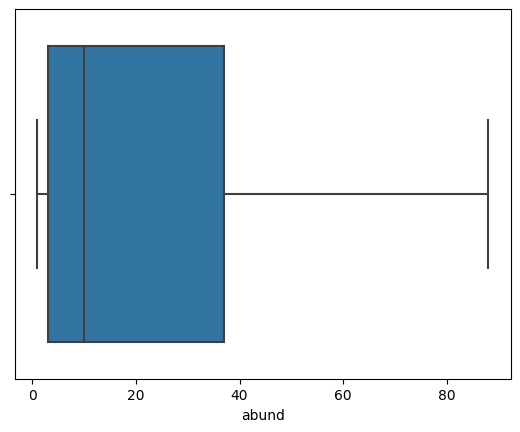

In [11]:
sns.boxplot(x=f['abund'],showfliers=False)

In [12]:
Q1 = f['abund'].quantile(0.25)
Q3 = f['abund'].quantile(0.75)
IQR = Q3 - Q1
print(Q3 + (1.5 * IQR))

88.0


<AxesSubplot: xlabel='count'>

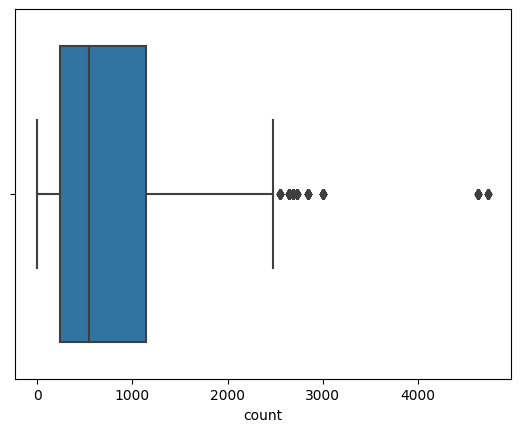

In [13]:
sns.boxplot(x=f['count'])

#### Check numbers of outliers

In [14]:
sum(f['count']>2500)

203

In [15]:
sum(f['abund']>88)

548

#### Plot count data without outliers

In [16]:
fc=f[f['count']<2500]

<AxesSubplot: xlabel='count', ylabel='Count'>

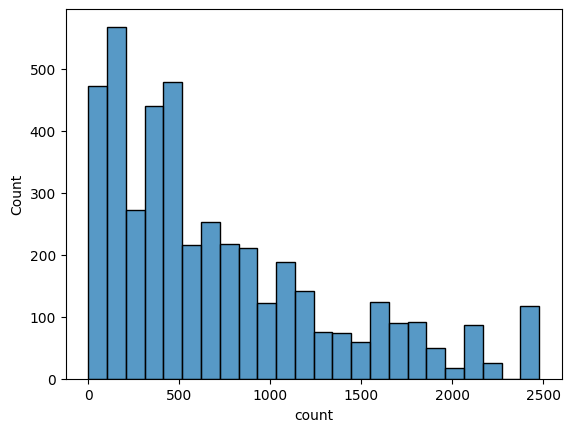

In [17]:
sns.histplot(x=fc['count'])

#### Plot abundance data without outliers

In [18]:
fa=f[f['abund']<88]

<AxesSubplot: xlabel='abund', ylabel='Count'>

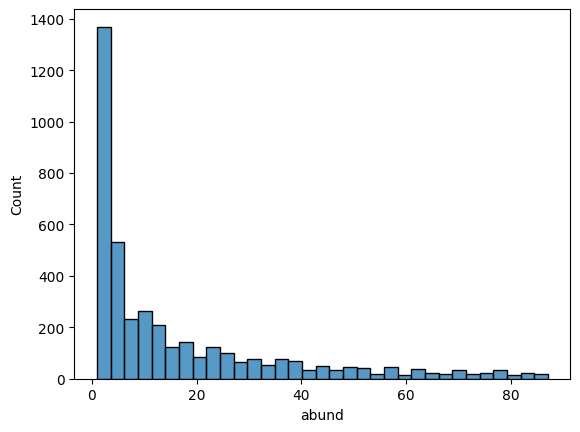

In [19]:
sns.histplot(x=fa['abund'])

#### will use count data as dependent variable

In [27]:
f=fc.drop('abund', axis=1)

In [28]:
f.head()

,ph,cond,ca,so4,no3,cl,alk,do,temp,count
1412,7.92,90.3,520.603664,2023.14771,495.79066,11.32551,207.945967,12.93,12.2,552.0
1413,7.92,90.3,520.603664,2023.14771,495.79066,11.32551,207.945967,12.93,12.2,552.0
1414,7.92,90.3,520.603664,2023.14771,495.79066,11.32551,207.945967,12.93,12.2,552.0
1415,7.92,90.3,520.603664,2023.14771,495.79066,11.32551,207.945967,12.93,12.2,552.0
1416,7.92,90.3,520.603664,2023.14771,495.79066,11.32551,207.945967,12.93,12.2,552.0


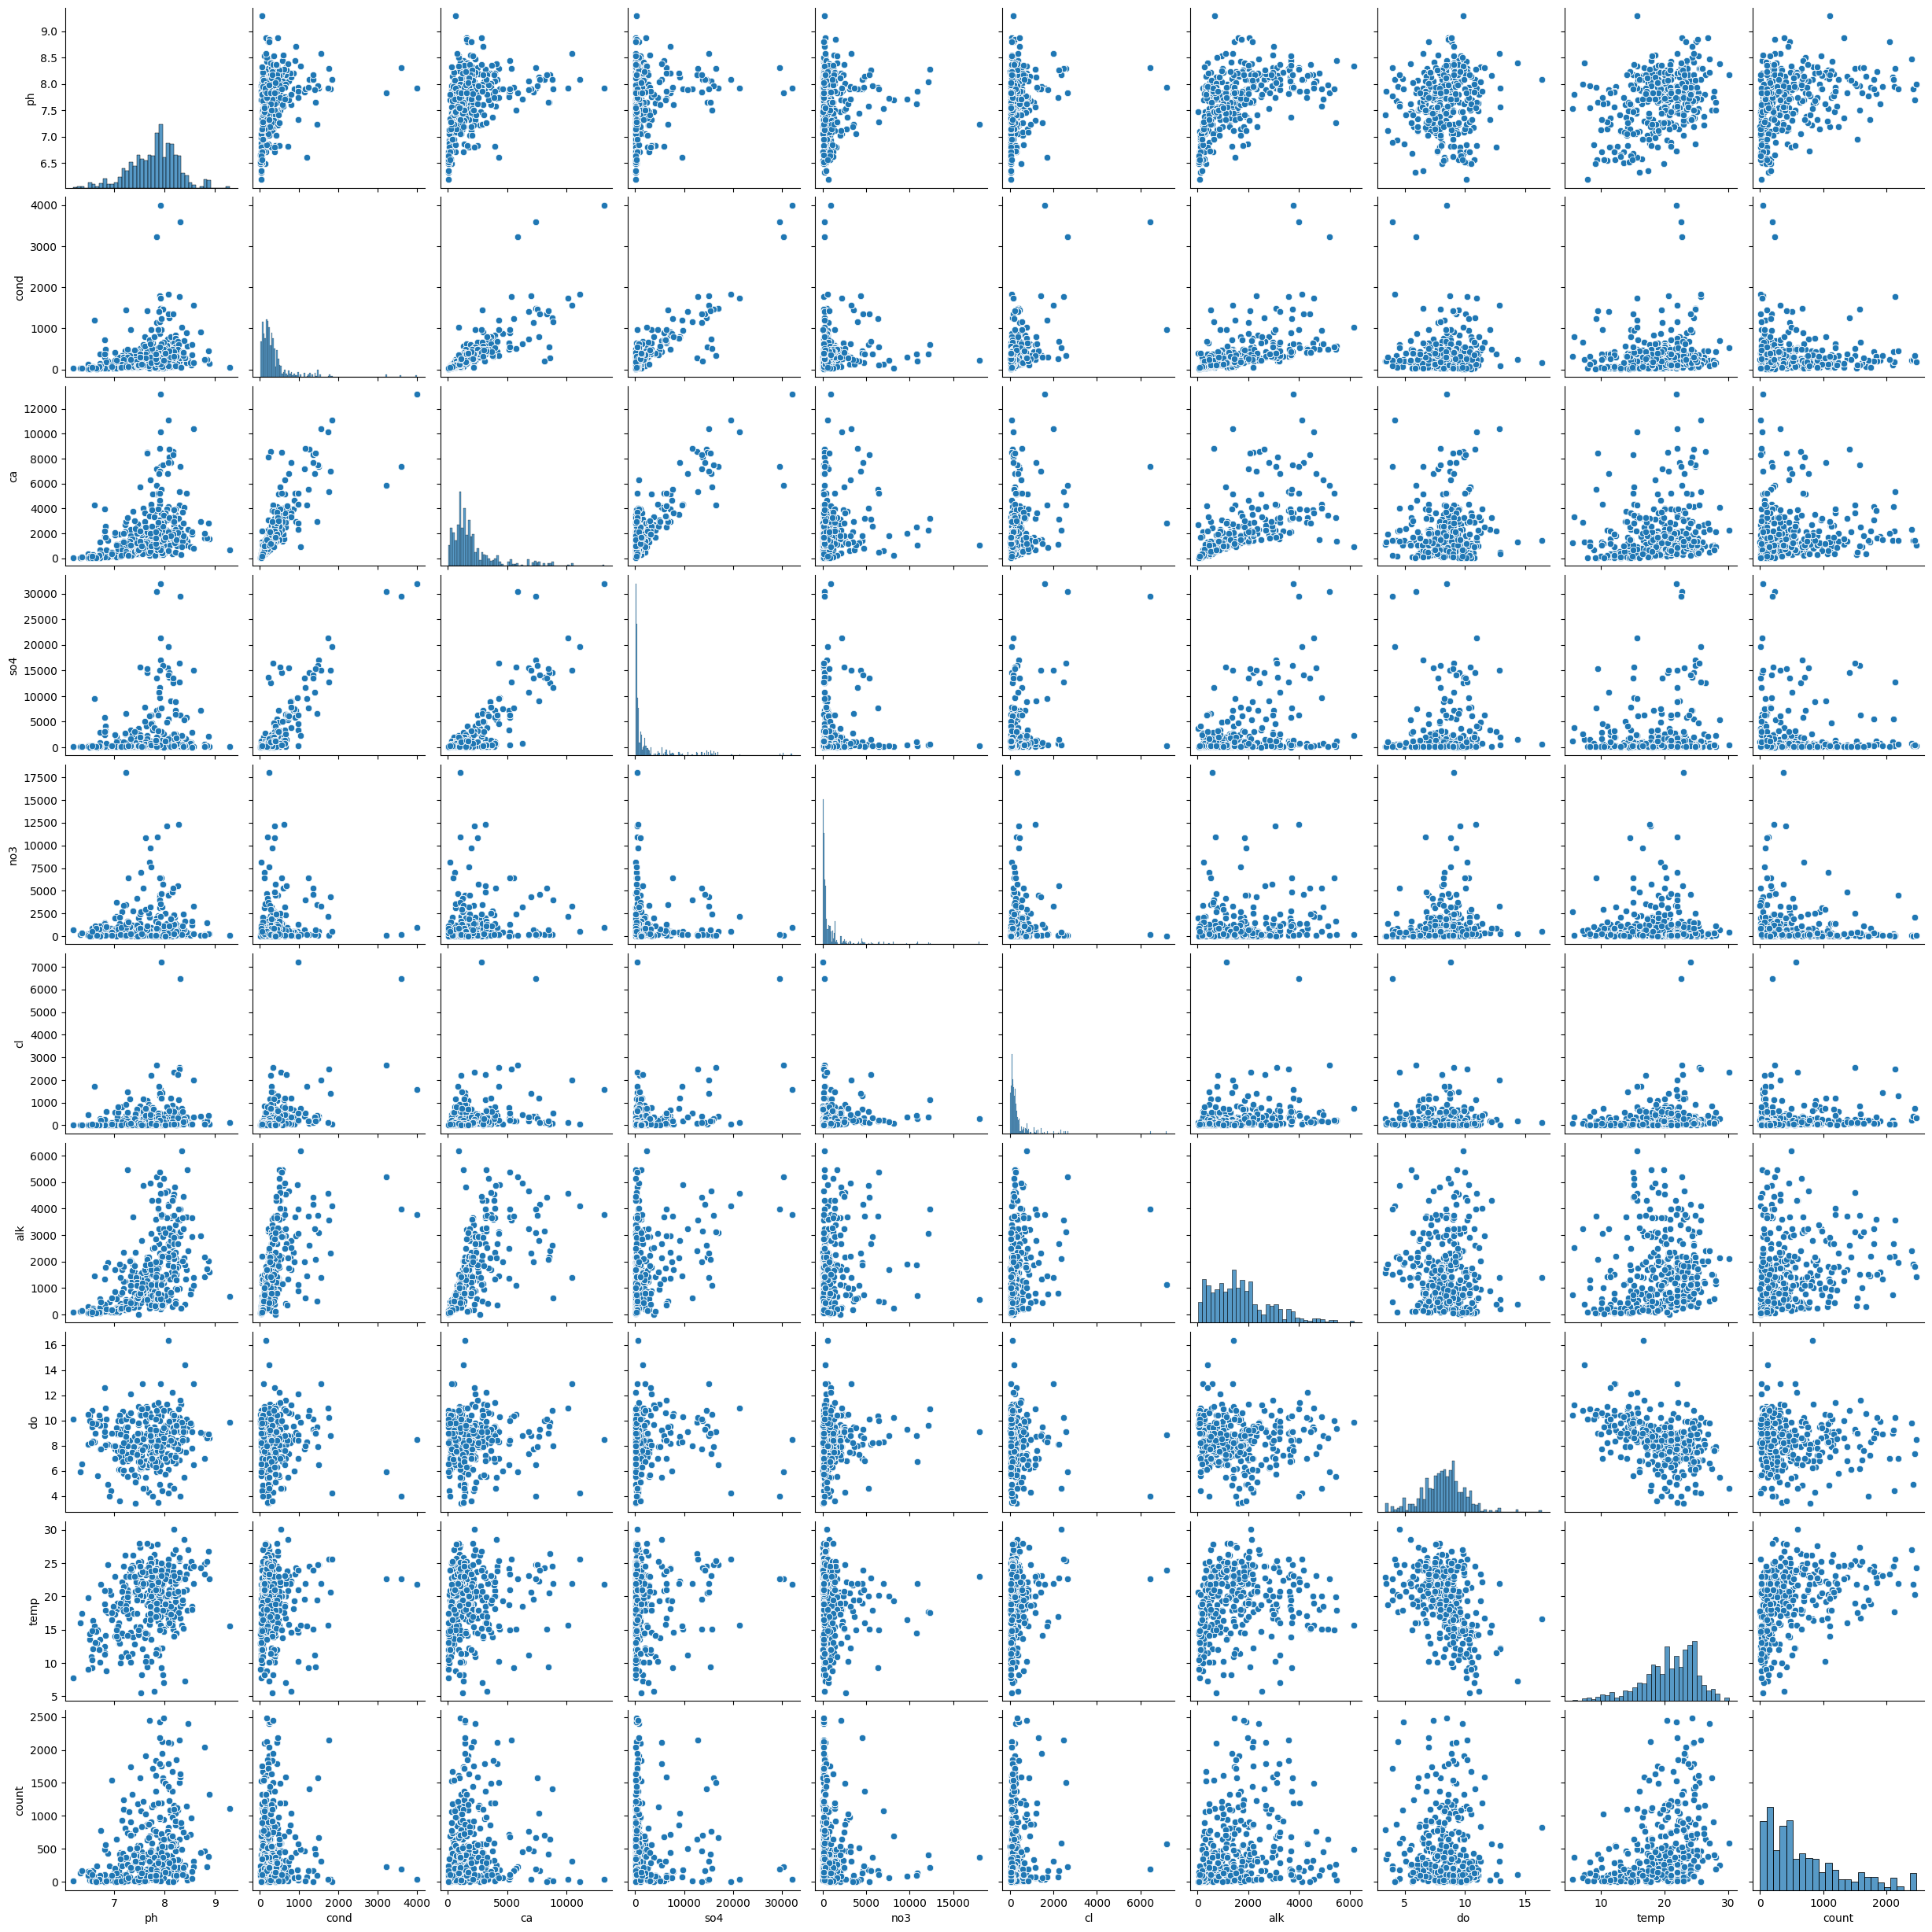

In [29]:
sns.pairplot(f)

In [1]:
#f.to_csv('fish_cleaned.csv')